In [1]:
import tensorflow as tf
import os
import cv2
from pylab import *
import numpy as np
import math

#from tensorflow.examples.tutorials.mnist import input_data

def download_mnist():
    data_dir = "MNIST_DATA'"
    if os.path.exists(data_dir):
        print('Found MNIST - skip')
        return
    else:
        os.mkdir(data_dir)
        url_base = 'http://yann.lecun.com/exdb/mnist/'
        file_names = ['train-images-idx3-ubyte.gz',
                      'train-labels-idx1-ubyte.gz',
                      't10k-images-idx3-ubyte.gz',
                      't10k-labels-idx1-ubyte.gz']
        
    for file_name in file_names:
        url = (url_base+file_name).format(**locals())
        print(url)
        out_path = os.path.join(data_dir,file_name)
        cmd = ['curl', url, '-o', out_path]
        print('Downloading ', file_name)
        #subprocess.call(cmd)
        #out_path = data_dir + '\\' + file_name
        cmd = ['gzip', '-d', out_path]
        print('Decompressing ', file_name, ' ' ,out_path)
        subprocess.call(cmd)

#download_mnist()

learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

#mnist = input_data.read_data_sets("./MNIST_DATA", one_hot=True)

# tensorflow graph input
X = tf.placeholder('float', [None, 784]) # mnist data image of shape 28 * 28 = 784
Y = tf.placeholder('float', [None, 10]) # 0-9 digits recognition = > 10 classes

# set model weights
W = tf.Variable(tf.random_uniform([784, 10], -1.0 , 1.0),name='W')
b = tf.Variable(tf.zeros([10]),name='b')

# Our hypothesis
activation = tf.add(tf.matmul(X, W),b)  # Softmax

# Cost function: cross entropy
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = activation, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)  # Gradient Descen

saver = tf.train.Saver()
# Before starting, initialize the variables. We will `run` this first.


In [ ]:
# Launch the graph,
"""
with tf.Session() as sess:
    init = tf.global_variables_initializer() 
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)

        # Fit the line.
        for step in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)

            # Fit training using batch data

            sess.run(optimizer, feed_dict={X: batch_xs, Y: batch_ys})

            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' %(epoch+1), "cost=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(Y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print ("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))
    
    model_name = "model"
    checkpoint_dir = "train"

    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)

    saver.save(sess,os.path.join(checkpoint_dir, model_name), global_step=1)
    
    sess.close()
"""

In [2]:
def get_mara_number(name,top, bottom, left, right):
    img =  cv2.imread(name,0)
    crop = np.zeros((bottom-top,right-left), 'uint8')
    print(crop.shape)
    for i in range(0,crop.shape[0]):
        for j in range(0,crop.shape[1]):
            if img[i+top,j+left] < 150 :
                crop[i,j] = 255
    
    return crop

def mnist_crop2(image):
    number = np.zeros((4,int(image.shape[0]),int(image.shape[1]/4)),'uint8')
    number_r = np.zeros((4,28,28),'uint8')
    number_mnist = np.zeros((4,784))
    number_r2 = np.zeros((4,28,28),'uint8')
    
    print("number : ",number.shape)
    for num in range(4):           
        for i in range(0,number[num].shape[0]):
            for j in range(0,number[num].shape[1]):
                if image[i,j+int((image.shape[1]/4)*num)] == 0 :
                    number[num,i,j] = 255
    
        #number_r = cv2.createmat(28, 28, cv.CV_8UC1)
        #number_r = np.zeros((28,28),'uint8')
        number_r[num] = cv2.resize(number[num],(28,28))
        for i in range(0,28):
            for j in range(0,28):
                if number_r[num,j,i] > 0 :
                    number_r[num,j,i] = 255
                    
        kernel = np.ones((3,3),np.uint8)
        number_r2[num] = cv2.erode(number_r[num],kernel,2)
        
        for i in range(0,28):
            for j in range(0,28):
                if number_r2[num,j,i] == 255 :
                    number_mnist[num,i*28+j] = 255
    
    return number, number_r2, number_mnist

(116, 324)
(47, 145)
(105, 278)


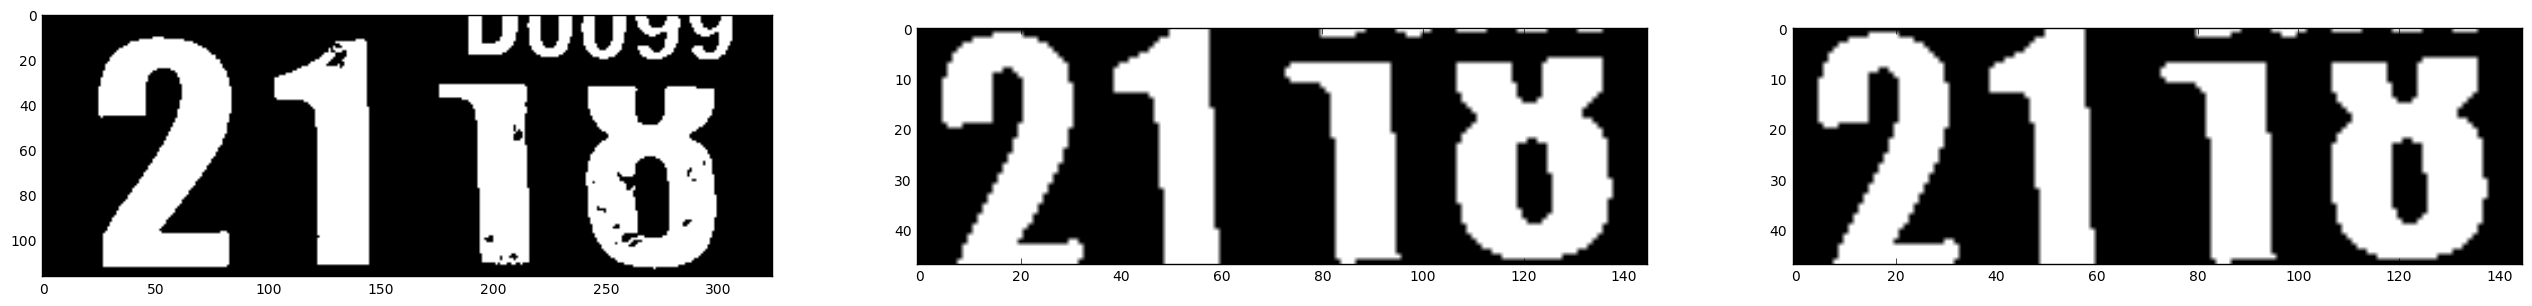

number :  (4, 116, 81)
number :  (4, 47, 36)
number :  (4, 105, 69)


In [4]:
mara1 =  "image/mara-1.jpg"
m_crop1 = get_mara_number(mara1,1438,1554,1089,1413)

mara2 =  "image/mara-2.jpg"
m_crop2 = get_mara_number(mara2,898,945,607,752)

mara3 =  "image/mara-3.jpg"
m_crop3 = get_mara_number(mara3,1580,1685,1122,1400)

fig, axs = subplots(1, 3, figsize=(32, 32))
axs[0].imshow(m_crop1)
axs[0].axis('on')
axs[1].imshow(m_crop2)
axs[1].axis('on')
axs[2].imshow(m_crop2)
axs[2].axis('on')
gray()
show()

answer = np.zeros((4,10))
answer[0,2] = 1
answer[1,1] = 1
answer[2,1] = 1
answer[3,8] = 1
    
mara_res1, mara1_mini, mara1_mnist = mnist_crop2(m_crop1)
mara_res2, mara2_mini, mara2_mnist = mnist_crop2(m_crop2)
mara_res3, mara3_mini, mara3_mnist = mnist_crop2(m_crop3)

In [10]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    import re
    ckpt = tf.train.get_checkpoint_state("train")
    print(ckpt)
    if ckpt and ckpt.model_checkpoint_path:        
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        saver.restore(sess, os.path.join("train", ckpt_name))
        counter = int(next(re.finditer("(\d+)(?!.*\d)",ckpt_name)).group(0))
        print(" [*] Success to read {}".format(ckpt_name))
    else:
        print(" [*] Failed to find a checkpoint")     
 
    for epoch in range(1000):
        avg_cost = 0.
        sess.run(optimizer, feed_dict={X: mara1_mnist, Y: answer})
        sess.run(optimizer, feed_dict={X: mara2_mnist, Y: answer})
        sess.run(optimizer, feed_dict={X: mara3_mnist, Y: answer})
                
        # Compute average loss         
        avg_cost += sess.run(cost, feed_dict={X: mara1_mnist, Y: answer})/4
        avg_cost += sess.run(cost, feed_dict={X: mara2_mnist, Y: answer})/4
        avg_cost += sess.run(cost, feed_dict={X: mara3_mnist, Y: answer})/4
        # Display logs per epoch step
        if epoch % 100 == 0:
            print("Epoch:", '%04d' %(epoch+1), "cost=", "{:.9f}".format(avg_cost))
    
    mara_res1_ = sess.run(activation, feed_dict={X:mara1_mnist} ) 
    mara_res2_ = sess.run(activation, feed_dict={X:mara2_mnist} ) 
    mara_res3_ = sess.run(activation, feed_dict={X:mara3_mnist} ) 
    
    print("Optimization Finished!")

    model_name = "model"
    checkpoint_dir = "train"
    if not os.path.exists(checkpoint_dir):
        os.makedirs(checkpoint_dir)

    saver.save(sess,os.path.join(checkpoint_dir, model_name), global_step=1)
    
    sess.close()

model_checkpoint_path: "train\\model-1"
all_model_checkpoint_paths: "train\\model-1"

 [*] Success to read model-1
Epoch: 0001 cost= 0.000000000
Epoch: 0101 cost= 0.000000000
Epoch: 0201 cost= 0.000000000
Epoch: 0301 cost= 0.000000000
Epoch: 0401 cost= 0.000000000
Epoch: 0501 cost= 0.000000000
Epoch: 0601 cost= 0.000000000
Epoch: 0701 cost= 0.000000000
Epoch: 0801 cost= 0.000000000
Epoch: 0901 cost= 0.000000000
Optimization Finished!


In [9]:
def findnum(array):
     maxn = max(array)
                
     maxnumb = 0
     for epoch in array:
         if epoch == maxn:
             break;
     
         maxnumb+=1
        
     return maxnumb

print("mara1 :")
for i in mara_res1_:
     print(findnum(i))

print("mara2 :")
for i in mara_res2_:
     print(findnum(i))
        
print("mara3 :")
for i in mara_res3_:
     print(findnum(i))

mara1 :
2
1
1
8
mara2 :
2
1
1
8
mara3 :
2
1
1
8
